In [1]:


df = _deepnote_execute_sql("""
SELECT *
FROM 'life-expectancy-vs-gdp-per-capita.csv' WHERE Year=2018 
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df

,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Afghanistan,AFG,2018,63.1,1934.5550,None,3.668679e+07,None
1,Africa,None,2018,62.3,NaN,None,1.295265e+09,None
2,Albania,ALB,2018,79.2,11104.1660,None,2.877019e+06,None
3,Algeria,DZA,2018,76.1,14228.0250,None,4.192701e+07,None
4,American Samoa,ASM,2018,72.5,NaN,None,4.844500e+04,None
...,...,...,...,...,...,...,...,...
266,World,OWID_WRL,2018,72.6,15212.4150,None,7.683790e+09,None
267,Yemen,YEM,2018,64.6,2284.8900,None,3.079051e+07,None
268,Yugoslavia,OWID_YGS,2018,NaN,16558.3120,None,NaN,None
269,Zambia,ZMB,2018,62.3,3534.0337,None,1.783590e+07,None


In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt

/tmp/ipykernel_465/3857679084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Life expectancy at birth (historical)', 'GDP per capita'],inplace= True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


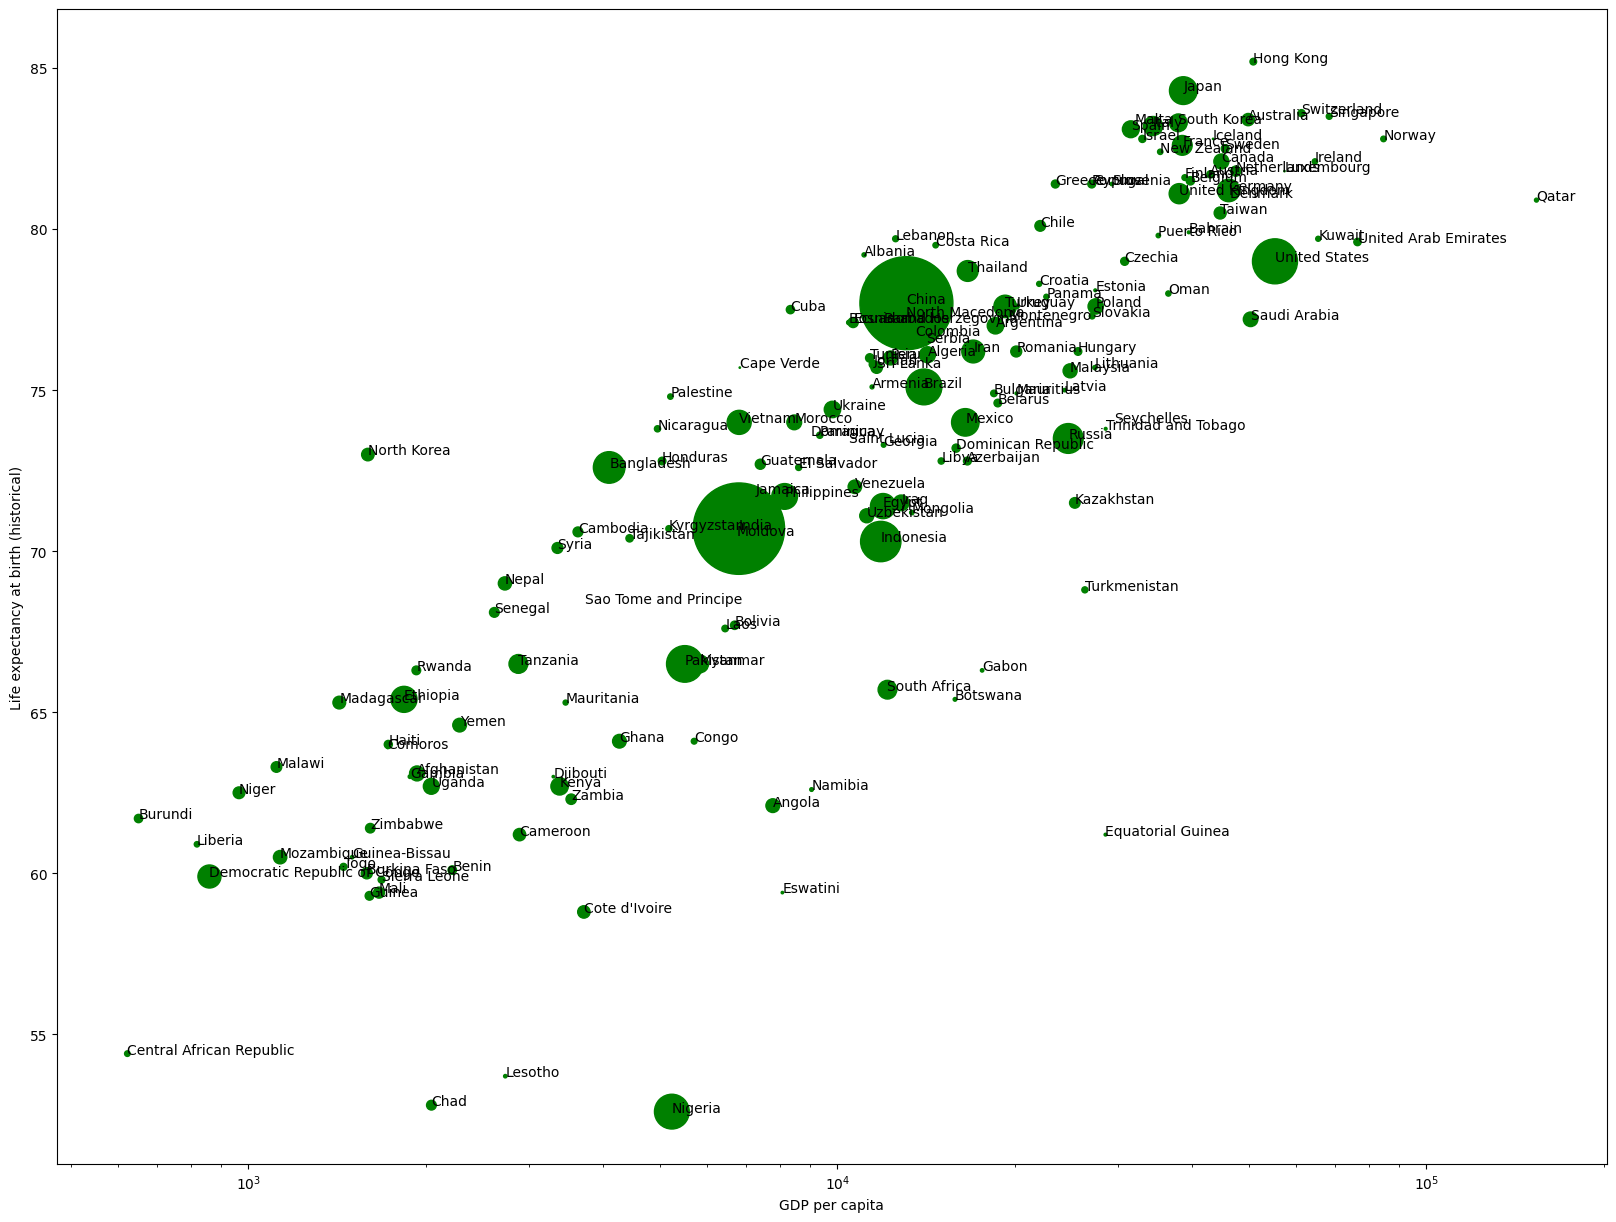

In [9]:
#DATA FILTER (Remove NaN/None and World entity)

df.dropna(subset=['Life expectancy at birth (historical)', 'GDP per capita'],inplace= True)
df = df[df['Entity'] != 'World']


#DRAW GRAPH (Plots a node for every country where size of node is correlated to the population size)

plotsize = df['Population (historical estimates)']
plotsize = [int(i/(10**5.5)) for i in df['Population (historical estimates)']]
df.plot.scatter(x='GDP per capita', y='Life expectancy at birth (historical)', c='Green',s=plotsize)
for idx, row in df.iterrows():
    plt.annotate(row['Entity'], (row['GDP per capita'], row['Life expectancy at birth (historical)']) )

#The xscale was made logarithmic for clarity purposes.
plt.xscale('log')
plt.rcParams["figure.figsize"] = (20,15)
plt.show()


In [4]:
#Mean of Life expectancy and GDP
LEmean = df['Life expectancy at birth (historical)'].mean()
GDPmean = df['GDP per capita'].mean()
print(LEmean)
print(GDPmean)

72.6321212121212
19053.786587272727


In [5]:
#Standard deviation for life expectancy
std=df['Life expectancy at birth (historical)'].std()
print(std)

7.795691335593796


In [6]:
#calculating countries that have a life expectancy higher than one standard deviation above the mean
dfMaxLife = df[df['Life expectancy at birth (historical)'] > (LEmean+std)]
dfMaxLife = dfMaxLife[['Entity', 'Life expectancy at birth (historical)']]

print(dfMaxLife)

             Entity  Life expectancy at birth (historical)
14        Australia                                   83.4
15          Austria                                   81.7
22          Belgium                                   81.5
39           Canada                                   82.1
55           Cyprus                                   81.4
59          Denmark                                   81.0
78          Finland                                   81.6
80           France                                   82.6
86          Germany                                   81.2
89           Greece                                   81.4
102       Hong Kong                                   85.2
104         Iceland                                   82.8
109         Ireland                                   82.1
111          Israel                                   82.8
112           Italy                                   83.2
114           Japan                                   84

In [45]:
#Calculating countries that have high life expectancy but have low GDP
#First we calculate the GDP by taking the product of population and GDP per capita

df['GDP'] = df['Population (historical estimates)'] * df['GDP per capita']

#New GDP mean
newGDPMean = df['GDP'].mean()
GDPstd = df['GDP'].std()

#First instance gdp < mean and Life expectancy > mean
dfHighLow = df[df['Life expectancy at birth (historical)'] > LEmean + std]
dfHighLow = dfHighLow[dfHighLow['GDP'] < newGDPMean - std]


#second instance
#dfHighLow =df[df['Life expectancy at birth (historical)'] > LEmean + std]
dfHighLow = dfHighLow[['Entity','Life expectancy at birth (historical)','GDP']]
print(dfHighLow)
print(len(dfHighLow))

          Entity  Life expectancy at birth (historical)           GDP
15       Austria                                   81.7  3.800368e+11
22       Belgium                                   81.5  4.551528e+11
55        Cyprus                                   81.4  3.313329e+10
59       Denmark                                   81.0  2.670689e+11
78       Finland                                   81.6  2.145334e+11
89        Greece                                   81.4  2.493584e+11
102    Hong Kong                                   85.2  3.803579e+11
104      Iceland                                   82.8  1.533168e+10
109      Ireland                                   82.1  3.127166e+11
111       Israel                                   82.8  2.786816e+11
140   Luxembourg                                   81.8  3.491133e+10
147        Malta                                   83.3  1.574509e+10
170  New Zealand                                   82.4  1.709749e+11
180       Norway    

In [42]:


df_2 = _deepnote_execute_sql("""SELECT * 
FROM 'dfHighLow' 
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_2

,Entity,Life expectancy at birth (historical),GDP
0,Cyprus,81.4,3.313329e+10
1,Iceland,82.8,1.533168e+10
2,Luxembourg,81.8,3.491133e+10
3,Malta,83.3,1.574509e+10
4,Slovenia,81.4,6.158778e+10


In [8]:
#Calculating the procent of countrys with high GDP per capita 
dfHighGDP = df[df['GDP per capita'] > GDPmean]
print(len(dfHighGDP))
dfHighGDP1=dfHighGDP[dfHighGDP['Life expectancy at birth (historical)'] > LEmean] 
print(len(dfHighGDP1))
57/60 * 100

60
57


95.0

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ed3b7122-722f-4a5d-a2f7-eda7eebbbfb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>